# **Daegu Apartment**

Dataset : [data_daegu_apartment.csv](https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Bussiness Problem Understanding**

**Context**

Daegu merupakan kota terbesar ke-3 di Korea Selatan setelah Seoul dan Busan. Memiliki Penduduk sekitar 2,5 Juta jiwa. Daegu dikelilingi oleh pegunungan Palgong-san di utara, Biseul-san di selatan, kaki bukit Gaya-san di barat, dan satu deretan bukit kecil di timur.Dengan pemandangan indah dan suasana yang tampak cukup sejuk ini, Daegu tetap saja seperti kota-kota metropolitan lainnya. Kehidupan perkotaan yang padat penduduk namun lahan terbatas membuat Daegu seperti kota metropolitan lainnya yang mengandalkan apartment sebagai pilihan untuk tempat tinggal penduduknya. Karena perkembangan Daegu yang pesat, permintaan akan perumahan apartemen pun meningkat. Hingga pada tahun 2021, jumlah total gedung apartemen di Daegu, Korea Selatan sudah mencapai jumlah kurang lebih 240 ribu. Di Korea Selatan sendiri terutama di kota-kota besar kebanyakan orang lebih memilih menjual/membeli apartment melalui agen properti. Ini membuat banyaknya agen properti yang menjajakan jasanya dalam membantu menjual atau membeli apartment. Karena jika menggunakan jasa agen properti, pembeli maupun penjual tidak perlu kesusahan dalam transaksi maupun pengurusan surat-surat.

[sumber 1](https://en.wikipedia.org/wiki/Daegu)<br>
[sumber 2](https://www.statista.com/statistics/1303257/south-korea-apartments-in-daegu-by-number-of-stories/#statisticContainer)

**Problem Statement**

Masalah pada bisnis ini yaitu sulitnya menentukan harga jual yang cocok untuk suatu apartment di daerah Daebong, Kota Daegu dengan fasilitas dan fitur-fitur yang tersedia. Oleh karena itu, dibutuhkan model yang tepat untuk menyelesaikan masalah penentuan harga jual apartment. Dengan harapan dapat menghasilkan keuntungan kepada pemilik maupun agen properti dengan menentukan harga jual apartemen yang lebih kompetitif. Dengan kata lain, agar harga jual apartemen dalam wilayah Daegu memiliki rata-rata harga yang tidak berbeda jauh antar satu dengan yang lainnya.


**Goals** 

Berdasarkan permasalahan yang ada, Agen properti tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu klien mereka (dalam hal ini pemilik apartemen) **untuk dapat menentukan harga jual properti yang tepat**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu properti, seperti tahun dibangunnya, jarak ke fasilitas publik terdekat, lokasi, dan tipe apartemen dapat meningkatkan keakuratan prediksi harga jual yang mana diharapkan dapat menghasilkan profit bagi pemilik apartemen.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu apartment dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu pemilik unit untuk dapat menyediakan 'tool' prediksi harga unit , yang mana akan berguna untuk pemilik dalam menentukan harga unit.

**Metric Evaluation**

Metric evaluation yang digunakan untuk model regresi adalah RMSE, MAE, dan MAPE.  RMSE adalah rata-rata akar kuadrat rata-rata kesalahan, MAE adalah rata-rata absolut dari kesalahan, sedangkan MAPE adalah rata-rata persentase kesalahan yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, 
dan MAPE, maka semakin akurat model tersebut dalam memprediksi harga sewa 
berdasarkan keterbatasan fitur yang digunakan. 

Selain itu, metric evaluation R-Squared dan Adjusted R-Squared juga dapat digunakan apabila model terbaik yang dipilih merupakan linear model. R-squared merupakan koefisien determinasi yang digunakan untuk mengukur seberapa baik garis regresi dalam merepresentasikan data. Nilai R-Squared memiliki range antara 0 - 1 dan semakin dekat nilainya dengan nilai 1 maka akan semakin baik garis regresi dalam merepresentasikan data. Namun, metrik ini tidak berlaku untuk model-model yang tidak linier.

## **2. Data Understanding**

* Dataset merupakan data listing Apartement di Daegu, Korea Selatan yang diambil dari laman [data.go.kr](https://www.data.go.kr/) dari tahun 2007 hingga 2017.
* Setiap baris data merepresentasikan informasi terkait unit apartment.

**Attributes Information**

| **Atribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Hallway Type | Object | Tipe apartemen |
| TimeToSubway | Object | Waktu yang dibutuhkan ke subway station terdekat |
| SubwayStation | Object | Nama subway station terdekat |
| N_FacilitiesNearBy(ETC) | Float64 | Jumlah fasilitas disekitar |
| N_FacilitiesNearBy(PublicOffice) | Float64 | Jumlah fasilitas kantor publik disekitar |
| N_SchoolNearBy(University) | Float64 | Jumlah Universitas disekitar | 
| N_Parkinglot(Basement) | Float64 | Jumlah lahan parkir | 
| YearBuilt | Int64 | Tahun apartemen dibangun | 
| N_FacilitiesInApt | Int64 | Jumlah fasilitas di apartemen | 
| Size(sqf) | Int64 | Ukuran Fasilitas (dalam meter persegi) | 
| SalePrice | Int64 | Harga unit apartemen (Won) |

### **Library**

In [1]:
! pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.0 MB/s eta 0:00:00


In [2]:
# Import library

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# Statistics
from scipy.stats import normaltest
from scipy.stats import skew

# Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# Preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### **Data**

In [3]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [4]:
# Info jumlah data pada tiap kolom dan type data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [5]:
# untuk mengecek apakah ada nilai kosong pada dataset
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [6]:
# Data unik pada feature TimeToSubway
df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

Dari yang terlihat untuk `TimeToSubway` memiliki format penulisan yang berbeda-beda ada yang menggunakan tanda '-' dan ada yang menggunakan tanda '~'. Oleh karena itu kita perlu menyesuaikan format penulisan penghubung yang tepat.

In [7]:
# Mengubah format penulisan pada feature TimeToSubway

df.loc[df['TimeToSubway'] == '5min~10min', 'TimeToSubway']='5min-10min'
df.loc[df['TimeToSubway'] == '10min~15min', 'TimeToSubway']='10min-15min'
df.loc[df['TimeToSubway'] == '15min~20min', 'TimeToSubway']='15min-20min'

In [8]:
# Pengecekan 
df[df['N_FacilitiesNearBy(PublicOffice)'] == 0]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
26,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
114,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1252,460176
316,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,338053
337,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,362831
390,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1256,469026
436,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,362831
443,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,361946
545,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,357522
566,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,1252,451327


Beberapa hal yang dapat dilihat dari `Daegu Apartment` dataset:
* Dataset Daegu Apartment memiliki 4123 baris data dan 11 kolom 
* Dataset tidak memiliki missing value
* Dataset memiliki 3 kolom kategorikal dan 8 kolom numerikal yang dibagi kedalam jenis float dan integer
* Beberapa kolom memiliki data value 0, yang dapat diinterpretasikan sebagai ketidaktersediaan fasilitas seperti yang disebutkan pada setiap kolom (Public Office, Parking Lot, University, dll)
* Investigasi lebih lanjut memperlihatkan data pada kolom `N_FacilitiesNearBy(PublicOffice)`dengan nilai 0 (46 baris data) terlihat, sepertinya berasal dari apartment yang sama. sehingga, faktor yang paling dapat mempengaruhi harga jual dari suatu apartment hanya kolom `Size(sqf)`

### **Exploratory Data Analysis (EDA)**

**Statistic Summary**

In [9]:
# Cek info fitur numerikal
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [10]:
# Apartment paling mahal dalam dataset
df[df['SalePrice']==585840]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2128,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,585840


In [11]:
# Apartment paling murah dalam dataset
df[df['SalePrice']==32743]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
1908,corridor,10min-15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,32743


**SalePrice Distribution of Daegu Apartment**

<Figure size 1000x700 with 0 Axes>

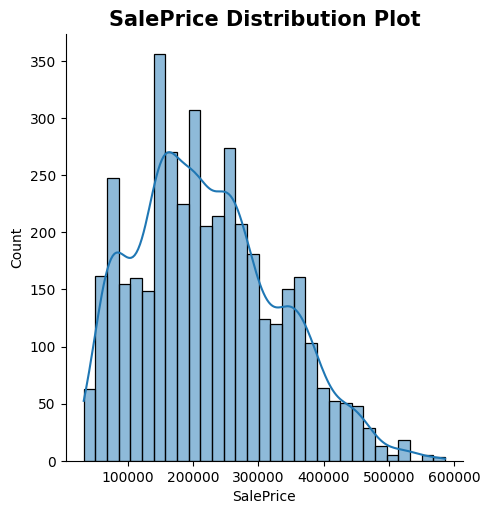

In [12]:
# Plot Distribusi dari kolom 'SalePrice'
plt.figure(figsize=(10,7))
sns.displot(df['SalePrice'], kde=True)
plt.title('SalePrice Distribution Plot', size=15, weight='bold')
plt.show()

Berdasarkan plot distribusi harga apartment diatas, terlihat bahwa terdapat 'right-skewed distribution'. Ini berarti terdapat skewness positif pada fitur `SalePrice`.

**HallwayType dan YearBuild**

<Axes: xlabel='HallwayType', ylabel='YearBuilt'>

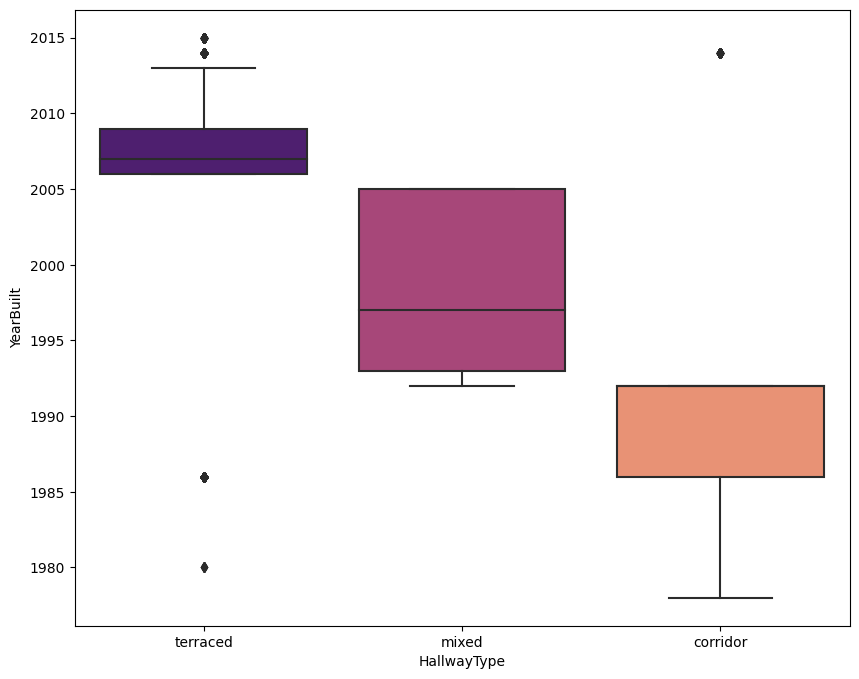

In [13]:
plt.subplots(figsize=(10,8))
sns.boxplot(x='HallwayType', y='YearBuilt', data=df, palette='magma')

Berdasarkan boxplot di atas memperlihatkan sebelum tahun 1995 apartment banyak menggunakan hallway tipe corridor. Lalu dari tahun 1995 hingga 2005 masih menggunakan tipe corridor hanya saja sudah di campur dengan tipe terraced. Dan sejak 2005 tipe corridor mulai jarang digunakan dan lebih dominan tipe terraced.

**Total Apartment Related To Subway Station Nearby**

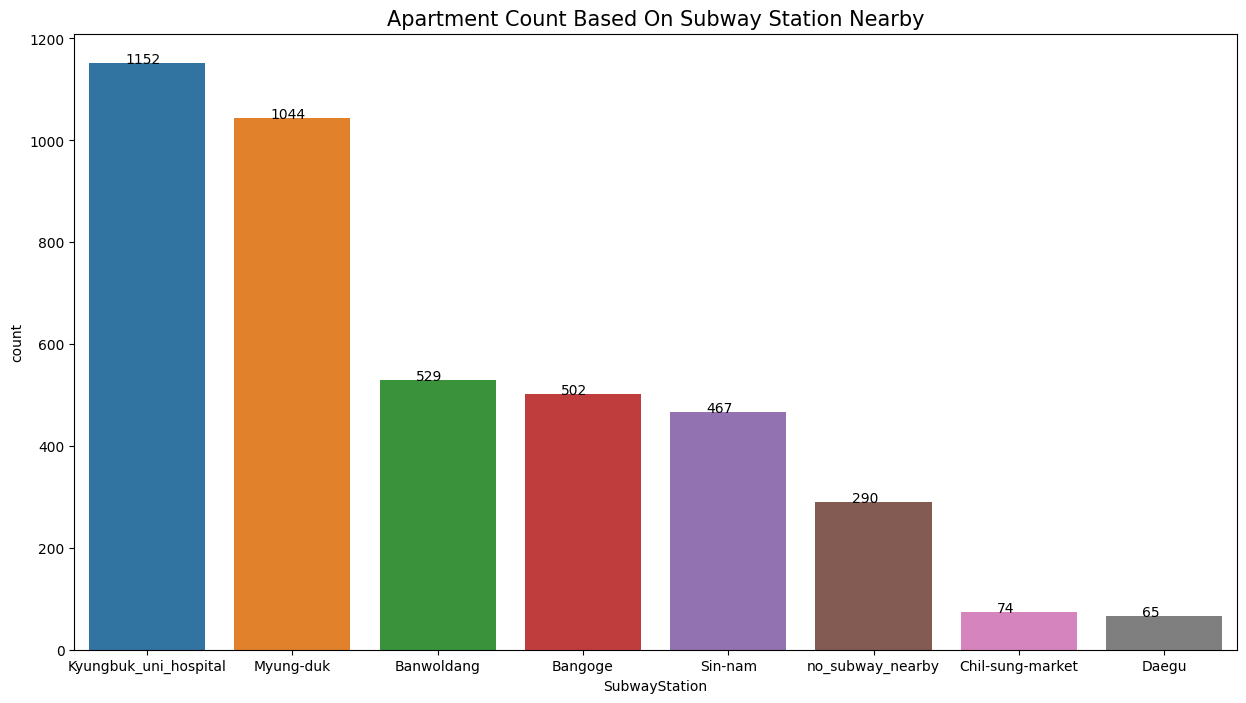

In [14]:
# Mengecek jumlah apartment berdasarkan stasiun subway terdekat dan tipe Hallway

plt.figure(figsize=(15,8))
fig = sns.countplot(x='SubwayStation', data=df,
                    order = df['SubwayStation'].value_counts().index)

for p in fig.patches :
    fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Apartment Count Based On Subway Station Nearby', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Apartment Count based on Hallway Type')

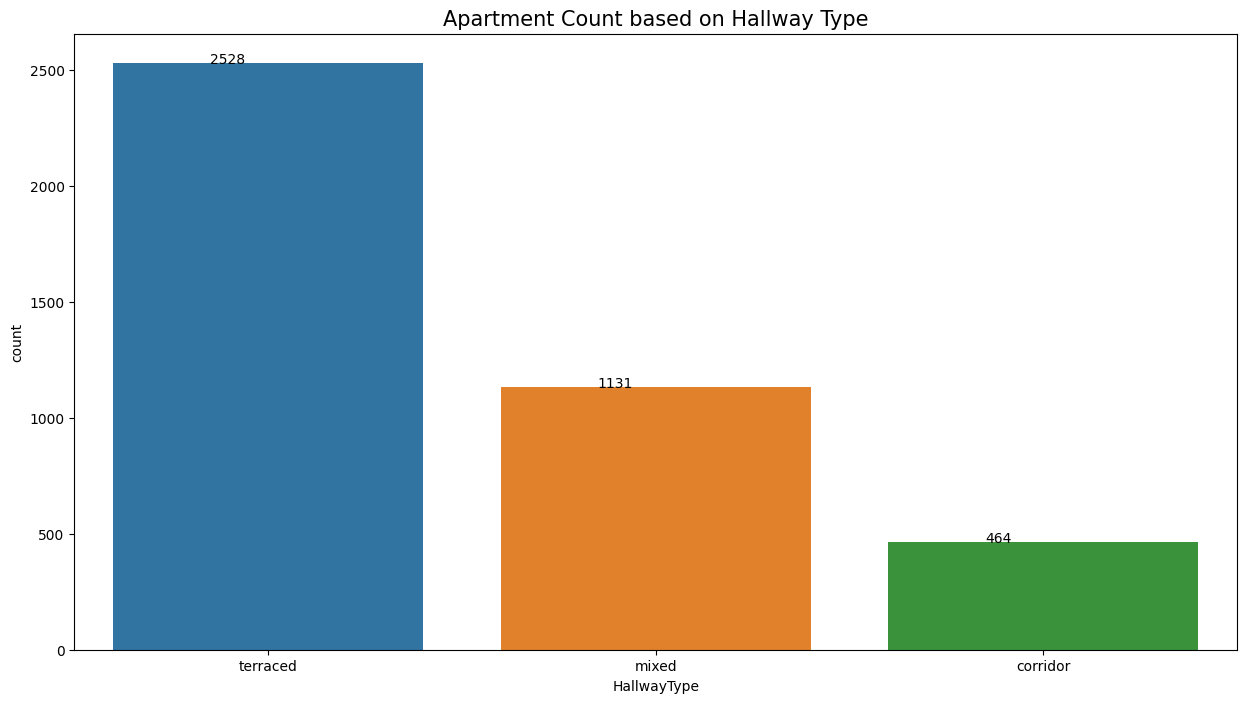

In [15]:
# Mengecek jumlah apartment berdasarkan tipe hallway nya

plt.figure(figsize=(15,8))
fig = sns.countplot(x='HallwayType', data=df,
                    order=df['HallwayType'].value_counts().index)

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Apartment Count based on Hallway Type', fontsize=15)

Jika dilihat dari grafik, mayoritas tipe dari apartement yang berada dekat dengan subway stasion `Kyungbuk_uni_hospital` dan `Myung_duk` adalah `terrace` dan diikuti tipe `mixed`.

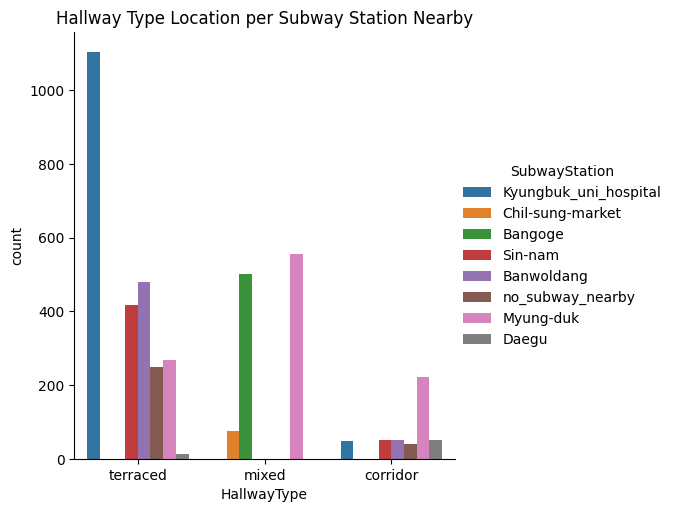

In [16]:
# Total Apartemen berdasarkan HallwaType dan SUbwayStation

sns.catplot(data=df, x='HallwayType', kind='count', hue='SubwayStation')
plt.title('Hallway Type Location per Subway Station Nearby')
plt.show()

Sebagian besar apartemen yang dekat dengan stasun subway `Kyungbuk_uni_hospital` memiliki tipe hallway `terraced`, sementara mayoritas apartemen yang dekat stasiun subway `Myung-duk` memiliki tipe hallway `mixed`, meskipun tipe lain juga dapat di temukan di area tersebut, walau dalam jumlah yang sedikit.

In [17]:
print('percentase HallwayType terraced',round(df['HallwayType'].value_counts().iloc[0]/len(df['HallwayType'])*100,2),'%')
print('percentase HallwayType mixed',round(df['HallwayType'].value_counts().iloc[1]/len(df['HallwayType'])*100,2),'%')
print('percentase HallwayType "corridor',round(df['HallwayType'].value_counts().iloc[2]/len(df['HallwayType'])*100,2),'%')

percentase HallwayType terraced 61.31 %
percentase HallwayType mixed 27.43 %
percentase HallwayType "corridor 11.25 %


In [18]:
# Melihat stasiun terdekat dengan mayoritas apartment berdasarkan jarak waktunya
df.groupby(df['TimeToSubway'])['SubwayStation'].value_counts()

TimeToSubway        SubwayStation        
0-5min              Kyungbuk_uni_hospital    791
                    Banwoldang               479
                    Sin-nam                  416
                    Myung-duk                267
10min-15min         Kyungbuk_uni_hospital    361
                    Myung-duk                222
15min-20min         Myung-duk                555
                    Chil-sung-market          74
5min-10min          Bangoge                  502
                    no_subway_nearby         119
                    Daegu                     65
                    Sin-nam                   51
                    Banwoldang                50
no_bus_stop_nearby  no_subway_nearby         171
Name: SubwayStation, dtype: int64

**Apartment Related To SalePrice**

In [19]:
# Harga Apartement per meter persegi

df_copy = df
df_copy['SalePriceSqf'] = df_copy['SalePrice'] / df_copy['Size(sqf)']

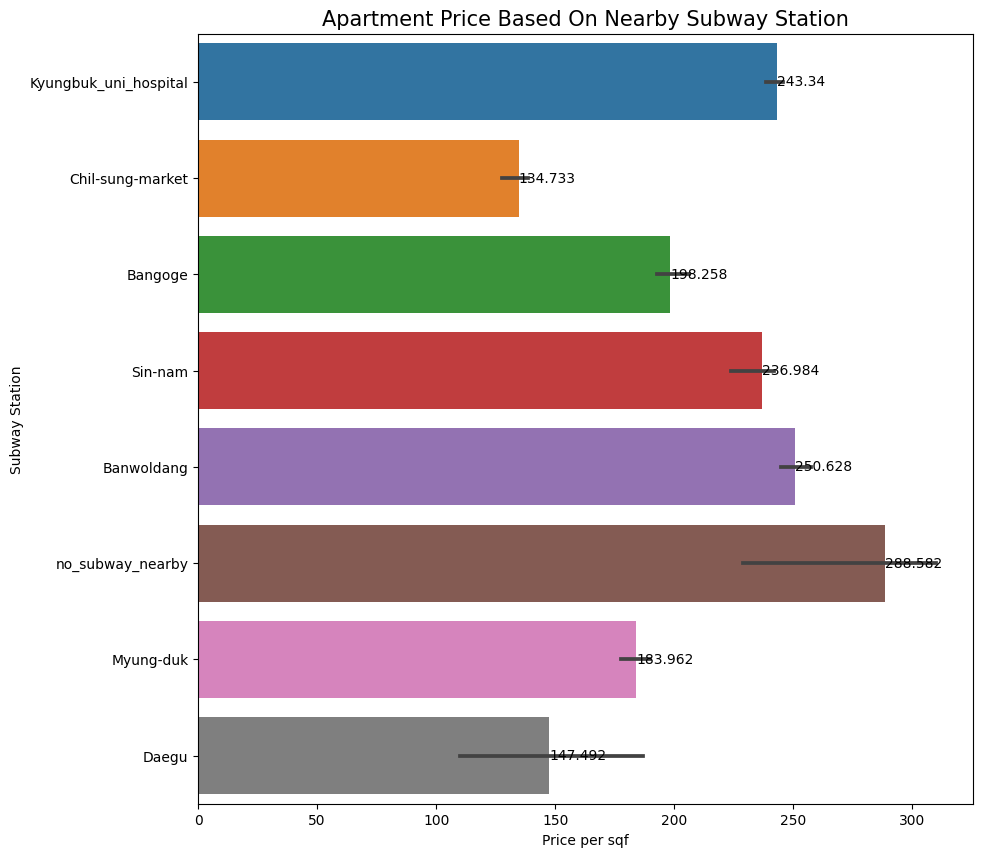

In [20]:
# Harga apartemen berdasarkan stasiun terdekat.

plt.figure(figsize=(10,10))
fig = sns.barplot(x='SalePriceSqf', y='SubwayStation', data=df_copy, estimator=np.median)
for i in fig.containers :
    fig.bar_label(i,)
plt.xlabel('Price per sqf')
plt.ylabel('Subway Station')
plt.title('Apartment Price Based On Nearby Subway Station', fontsize=15)
plt.show()

seperti yang terlihat pada barplot diatas, nilai tengah dari harga apartment per meter persegi yang tertinggi adalah apartemen yang tidak dekat dengan stasiun, sedang apartment yang memiliki nilai tengah tertinggi kedua adalah  yang dekat stasiun Banwoldang.

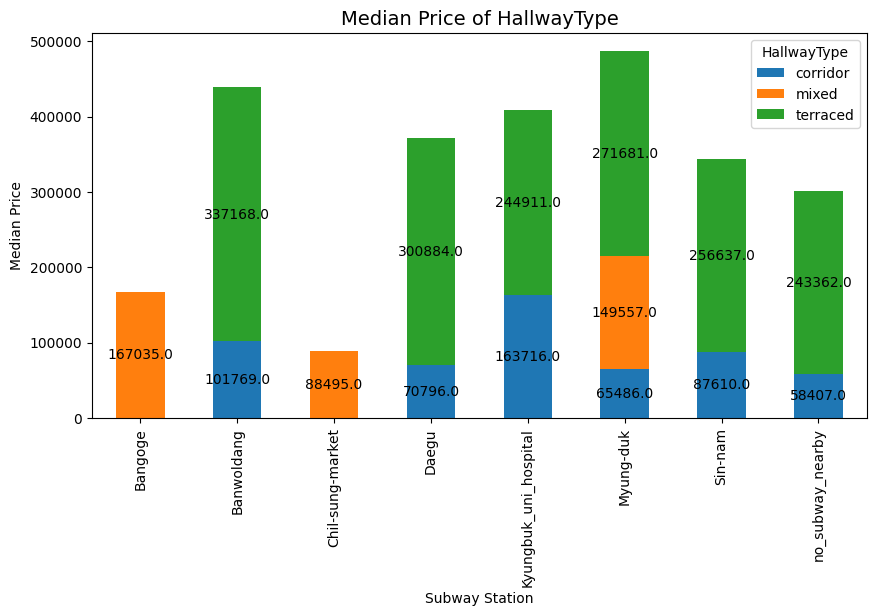

In [21]:
# Rata-Rata SalePrice apartemen untuk tiap HallwayType di setiap SubwayStation terdekat

table = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

median_price = table.plot(kind='bar', stacked=True, figsize=(10,5))
for i in median_price.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in i]
    median_price.bar_label(i, labels=labels, label_type='center')
plt.xlabel('Subway Station')
plt.ylabel('Median Price')
plt.title('Median Price of HallwayType', fontsize=14)
plt.show()

Grafik diatas memperlihatkan apartemen dengan tipe `corridor` memiliki harga rata-rata yang cukup rendah, sedangkan yang tipenya `terraced` memiliki harga rata-rata yang tinggi. Hal ini menunjukkan permintaan apartemen dengan tipe `terraced` sangat tinggi hampir disemua area.

In [22]:
# Melihat jumlah apartment yang dibangun berdasarkan tahun
df['YearBuilt'].value_counts()

2007    853
2005    502
2006    460
1993    451
1992    326
2013    322
2014    292
1986    273
2008    203
2009    171
2015     92
1997     67
1985     51
1978     49
2003      7
1980      4
Name: YearBuilt, dtype: int64

Informasi yang bisa didapat berdasarkan data diatas yaitu:

* Terdapat 4.123 data dengan 11 feature pada dataset.
* Tipe apartment yang paling banyak jumlahnya adalah tipe 'terraced'(61.31%), lalu tipe 'mixed'(27.43%) dan terakhir tipe 'corridor'(11.25%).
* Jika dilihat berdasarkan TimeToSubway apartment di Daegu cukup banyak yang dekat dengan stasiun yaitu membutuhkan waktu 0-5 menit saja menuju stasiun dan Stasiun Kyungbuk_uni_hospital merupakan stasiun yang paling dekat dengan mayoritas apartment.
* Apartment di Daegu paling banyak dibangun tahun 2007
* Apartment di Daegu memiliki rata-rata 6 fasilitas di dalam apartmennya sehingga bisa dikatakan cukup baik.
* Ukuran dan harga apartment di Daegu juga cukup bervariasi dengan rata-rata berukuran 954,63 square feet dan rata-rata harga 221767,93 won.

## **3. Data Preprocessing**

Pada tahap ini, kita akan melakukan pembersihan data, yang nanti akan digunakan untuk analisis lebih lanjut. Beberapa hal yang perlu dilakukan adalah :

- Mendrop features yang tidak memiliki relevansi dengan permasalahan yang ada
- Melakukan treatment pada missing value jika ada. Dapat dilakukan dengan mendrop feature jika tidak diperlukan dalam analisa atau dengan mengisinya dengan nilai yang paling masuk akal berdasarkan kasus ini.

untuk tahap preprocessing dan feature engineering kita akan menggunakan data duplikat dari dataframe yang digunakan sebelumnya.

In [23]:
# Menduplikasi dataframe
df_model = df.copy()

In [24]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().unique())]);

df_desc = pd.DataFrame(columns=['Features', 'DataType', 'Null', 'NullPct', 'Unique', 'UniqueSample'],
                     data=listItem)
df_desc

,Features,DataType,Null,NullPct,Unique,UniqueSample
0,HallwayType,object,0,0.0,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[0-5min, 10min-15min, 15min-20min, 5min-10min,..."
2,SubwayStation,object,0,0.0,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,int64,0,0.0,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,int64,0,0.0,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0,0.0,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


Tipe data dari kolom `N_FacilitiesNearBy(ETC)`, `N_FacilitiesNearBy(PublicOffice)`, `N_SchoolNearBy(University)`, dan `N_Parkinglot(Basement)` bersifat float, yang seharusnya menjadi tipe data integer.

In [25]:
# Mengubah tipe data dari float menjadi integer.
df_model['N_FacilitiesNearBy(ETC)'] = df_model['N_FacilitiesNearBy(ETC)'].astype('int64')
df_model['N_FacilitiesNearBy(PublicOffice)'] = df_model['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df_model['N_SchoolNearBy(University)'] = df_model['N_SchoolNearBy(University)'].astype('int64')
df_model['N_Parkinglot(Basement)'] = df_model['N_Parkinglot(Basement)'].astype('int64')

**Missing Value**

<Axes: >

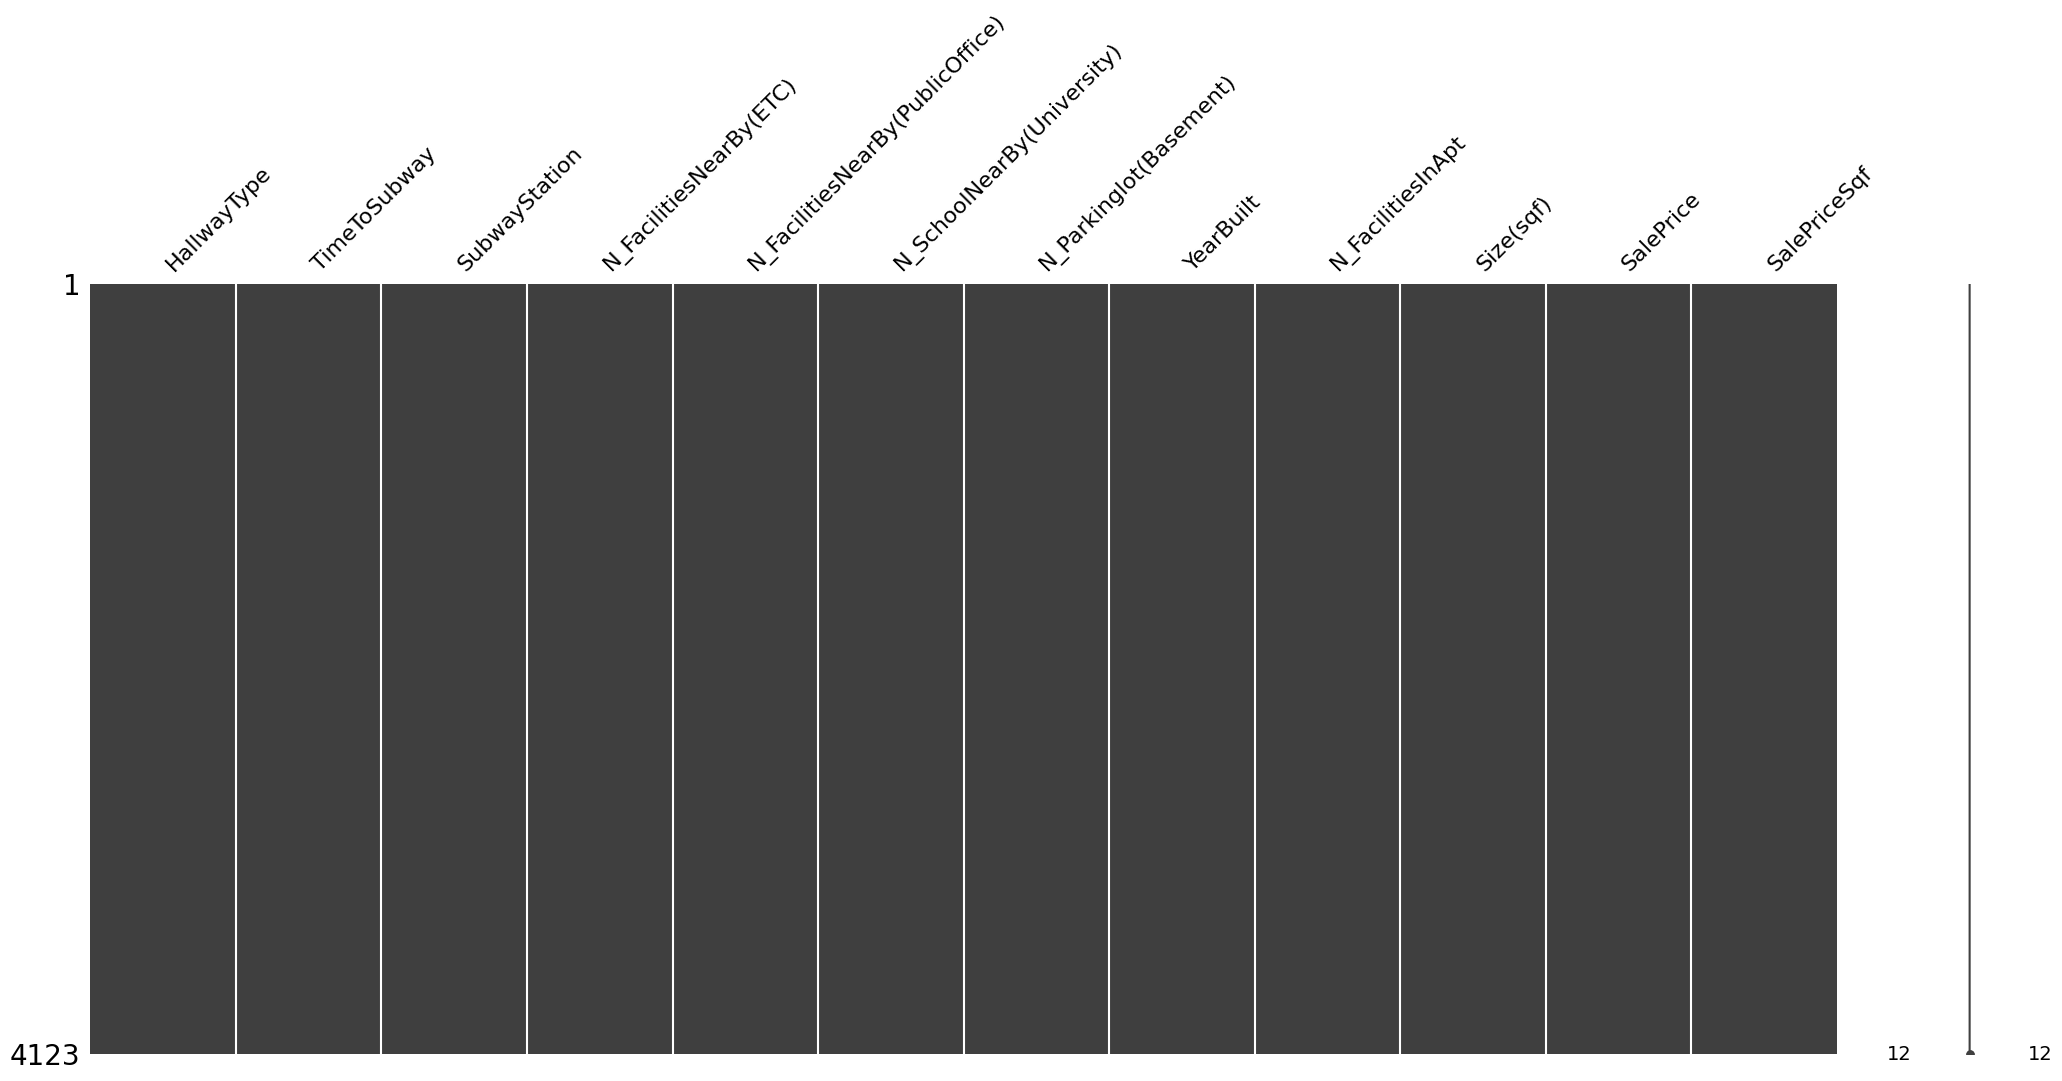

In [26]:
import missingno

missingno.matrix(df_model)

In [27]:
df_model.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
SalePriceSqf                        0
dtype: int64

Berdasarkan hasil pengecekan menunjukkan bahwa dalam dataset `Daegu Apartment` tidak terdapat missing value.

**Duplicate Data**

In [28]:
# Melakukan pengecekan terhadap data duplikat

print(f'Jumlah data duplikat pada dataset "Daegu Apartment" adalah: {df_model.duplicated().sum()} baris\n')
display(df_model[df_model.duplicated()])

Jumlah data duplikat pada dataset "Daegu Apartment" adalah: 1422 baris



,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,SalePriceSqf
55,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,910,263345,289.390110
56,terraced,0-5min,Banwoldang,0,0,0,203,2014,10,914,371681,406.653173
122,terraced,0-5min,Kyungbuk_uni_hospital,0,5,3,930,2013,7,644,149274,231.791925
127,terraced,0-5min,Banwoldang,0,2,2,524,2007,4,1394,256637,184.101148
133,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,644,168141,261.088509
...,...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min-10min,Daegu,0,3,2,400,2015,7,644,300884,467.211180
4114,corridor,10min-15min,Myung-duk,5,7,5,0,1992,3,355,86725,244.295775
4115,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141,95.480409
4120,mixed,15min-20min,Myung-duk,5,6,5,536,1993,4,1761,168141,95.480409


Dataset `Daegu Apartments` memiliki 1422 baris data duplikat, jadi diputuskan untuk mendrop data yang duplikat tersebut dan hanya mempertahankan data pertama saja.

In [29]:
# Melakukan pengecekan jumlah data duplikat setelah dilakukan drop duplikat
df_model.drop_duplicates(keep='first', inplace=True)
print(f'Jumlah data duplikat pada dataset "Daegu Apartment" adalah: {df_model.duplicated().sum()} baris\n')

Jumlah data duplikat pada dataset "Daegu Apartment" adalah: 0 baris



**Data Correlation**

Text(0.5, 1.0, 'Correlation Matrixs')

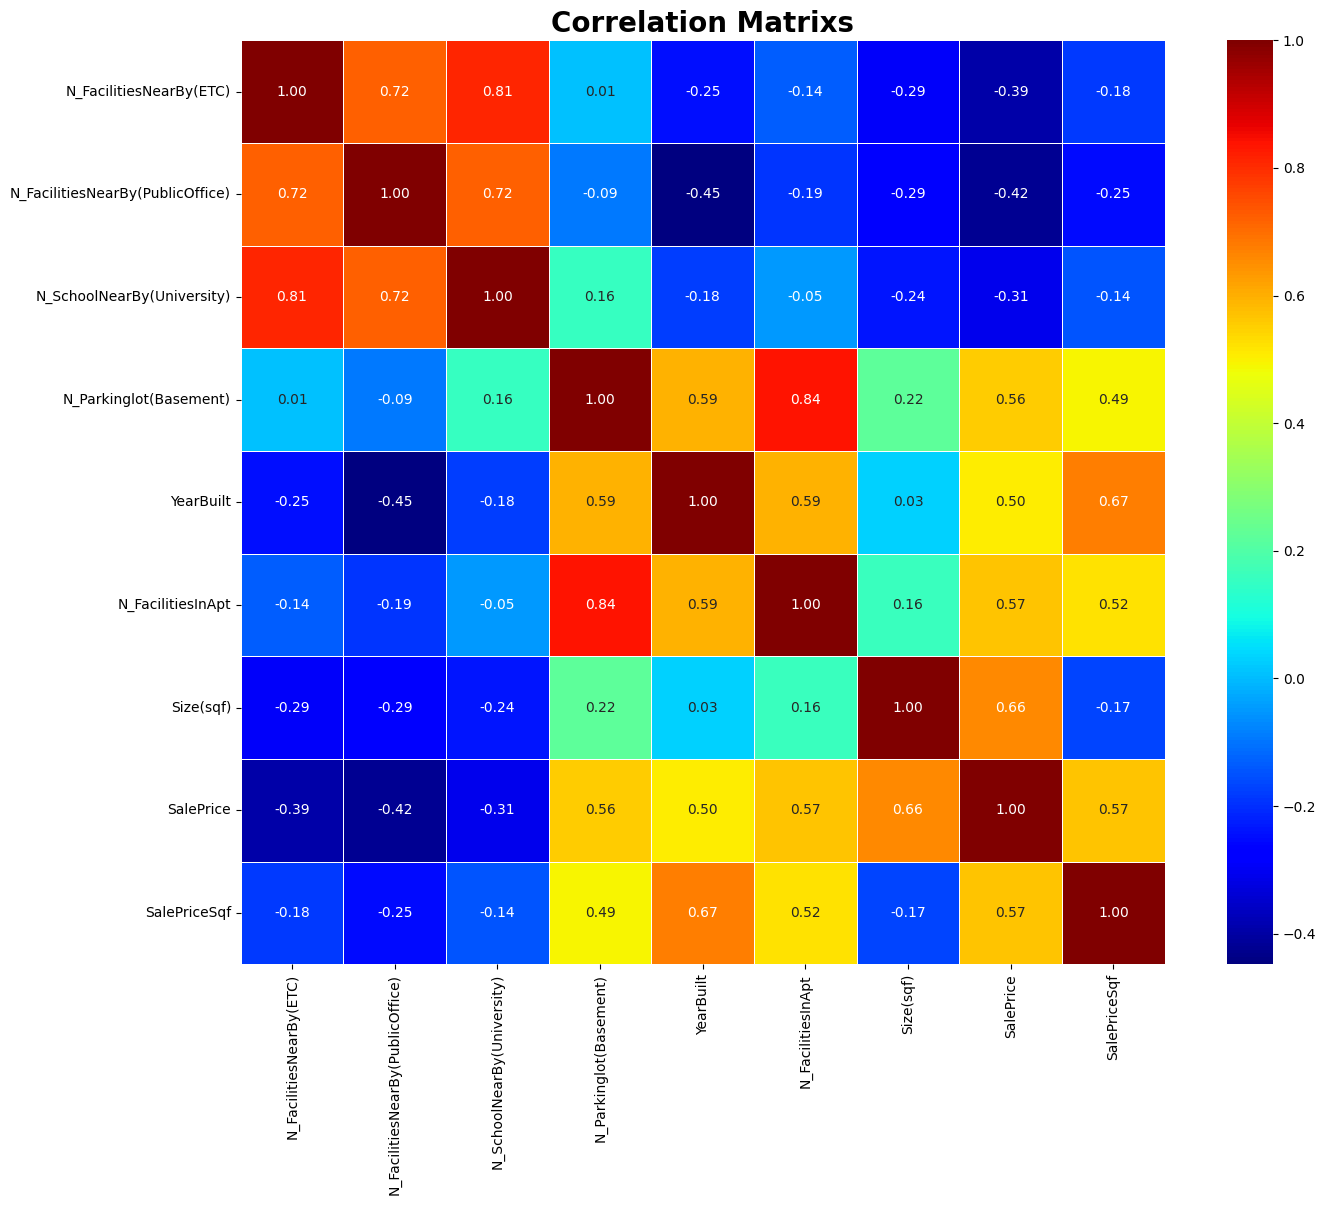

In [30]:
# Correalation Matrix

plt.figure(figsize=(16,12))
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='jet', square=True, linewidths=.5)
plt.title('Correlation Matrixs', size=20, weight='bold')

Terdapat korelasi yang kuat antara variable independent, seperti `N_FacilitiesNearBy(ETC)` dan `N_SchoolNearBy(University)` yang mengindikasikan adanya multicolinearitas. Ketika dua independent variable memiliki korelasi diatas 0.7, ini mengindikasikan multicolinearitas yang cukup signifikan. Hal ini sangat mempengaruhi analisis regresi yang menggunakan metode least square untuk mengestimasi parameter regresi. Ketika ada Multikolinearitas, slop kemiringan multiple linear regression menjadi tidak valid karena bukan hanya nilai dependent variable yang berubah.

Fitur dengan korelasi yang tinggi terhadap target `SalePrice` adalah `Size(sqf)` dengan nilai korelasi positif 0.66. Ini artinya semakin besar ukuran unit apartment, maka harganya akan semakin mahal. Bagaimanapun, hubungan antara `Size(sqf)` dan `SalePrice` disebut sebagai "korelasi moderat" karena nilai korelasinya kurang dari 0.7 dan tidak memiliki korelasi yang kuat dengan variable numerik independen lainnya.

Sementara, fitur `N_FacilitiesNearBy(PublicOffice)` memiliki nilai -0.42 terhadap `SalePrice`. Ini artinya `SalePrice` akan meningkat ketika jumlah `N_FacilitiesNearBy(PublicOffice)` menurun.

**Outliers Detection**

Adanya outliers pada data tentu akan berdampak pada hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang perlu dipertimbangkan sebelum memutuskan perlakuan yang tepat untuk data tersebut, termasuk mempertimbangkan pengetahuan domain.

<Axes: >

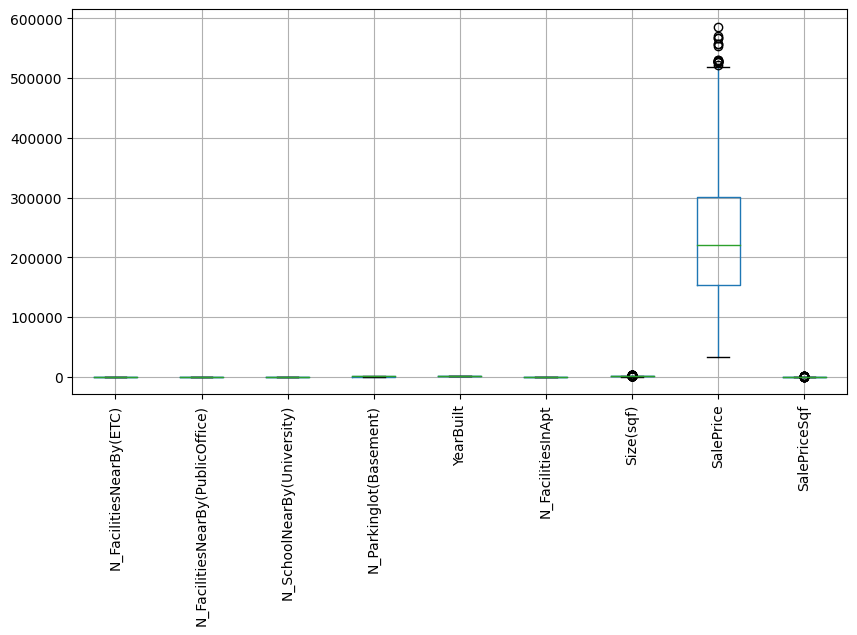

In [31]:
# Plotting boxplot untuk mengecek outliers

plt.figure(figsize=(10,5))
df_model.boxplot(rot=90)

Boxplot memperlihatkan `SalePrice` dan `Size(sqf)` adalah fitur yang memiliki outliers. untuk menghapus outliers dari dataset, maka rekayasa data akan dilakukan pada fitur-fitur tersebut dengan mempertimbangkan hasil kombinasi dari metode IQR. Model yang dihasilkan hanya akan mampu memprediksi listing baru dengan nilai dalam rentang data berdasarkan dataset bersih ini. Setiap hasil prediksi dari model diluar rentang data akan menjadi bias.

In [32]:
# Fungsi untuk mengecek outliers

def outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

**Pengecekan outliers dari `Size(sqf)`**

In [33]:
# Check outliers for feature 'Size(sqf)'

outlier(df_model['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [34]:
# Check statistik deskriptif untuk fitur 'Size(sqf)'

df_model['Size(sqf)'].describe()

count    2701.000000
mean      984.028878
std       391.982619
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [35]:
# Mengecek jumlah nilai 'Size(sqf)' > 1803.0

df_model[df_model['Size(sqf)'] > 1803.0].count()['Size(sqf)']

84

Berdasarkan tabel statistik deskriptif diatas, quartil ketiga (75% dari data) pada kolom `Size(sqf)` adalah 1167, sedangkan nilai maksimumnya adalah 2337 (dua kali lebih banyak). Dapat disimpulkan distribusi data dari fitur `Size(sqf)` miring ke kanan (positif skewness).

Karena itu, data dengan nilai diatas batas atas dari metode IQR akan di drop dan tidak dimasukkan dalam modeling, untuk mengurangi kemiringannya. Hal ini tentu akan menjadi batasan model yang akan dibuat nanti.

Text(0.5, 0, 'Selected Size(sqf)')

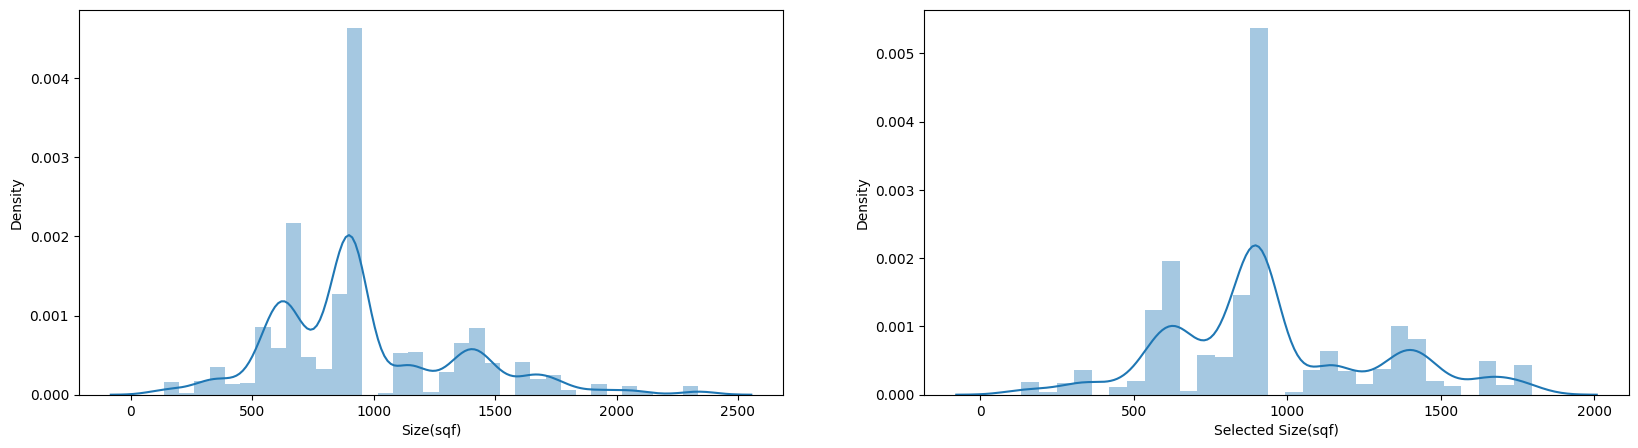

In [36]:
# Memfilter data dari outliers

df_model = df_model[(df_model['Size(sqf)'] <= 1803.0)]

# Plot distribusi Size sebelum dan sesudah filtering

fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.distplot(df['Size(sqf)'], ax=axes[0])
sns.distplot(df_model['Size(sqf)'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Selected Size(sqf)')

**Pengecekan outliers dari `SalePrice`**

In [37]:
# Mengecek Outliers pada fitur 'SalePrice'

outlier(df_model['SalePrice'])

IQR: 144248.0
limit_bawah: -65930.0
limit_atas: 511062.0


In [38]:
# Mengecek Statistik deskriptif pada fitur 'SalePrice'

df_model['SalePrice'].describe()

count      2617.000000
mean     225281.601834
std      102129.386220
min       32743.000000
25%      150442.000000
50%      217699.000000
75%      294690.000000
max      566371.000000
Name: SalePrice, dtype: float64

In [39]:
# Mengecek jumlah nilai 'SalePrice' > 511062.0

df_model[df_model['SalePrice'] > 511062.0].count()['SalePrice']

10

Berdasarkan pada tabel statistik deskriptif diatas, nilai kuartil ketiga (75% dari data) pada kolom `SalePrice` adalah 294690, sementara nilai maximumnya adalah 566371 (dua kali lebih banyak). Dapat disimpulkan bahwa distribusi data dari fitur `SalePrice` miring ke kanan (positif skewness).

Karena itu, data dengan nilai diatas batas atas dari metode IQR akan di drop dan tidak dimasukkan dalam modeling, untuk mengurangi kemiringannya. Hal ini tentu akan menjadi batasan model yang akan dibuat nanti.

Text(0.5, 0, 'Selected Size(sqf)')

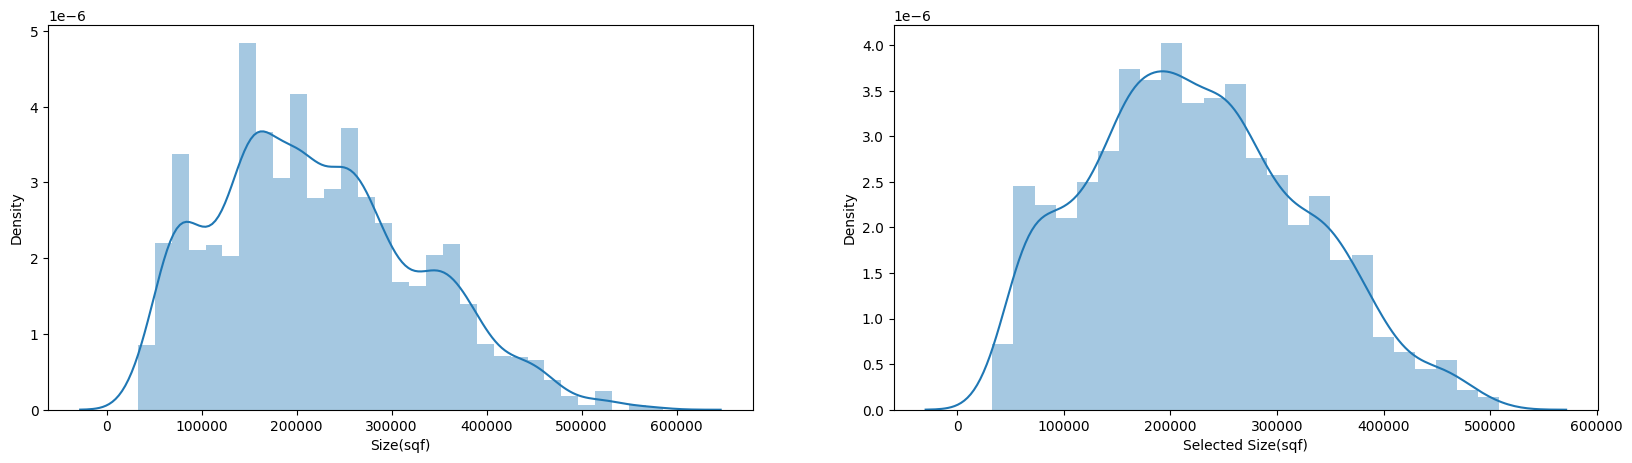

In [40]:
# Memfilter data dari outliers

df_model = df_model[(df_model['SalePrice'] <= 511062.0)]

# Plot distribusi SalePrice sebelum dan sesudah di filter

fig, axes = plt.subplots(1,2, figsize=(20, 5))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('Size(sqf)')
axes[1].set_xlabel('Selected Size(sqf)')

**Clean Dataset**

In [41]:
df_model.drop(columns='SalePriceSqf', inplace=True)

In [42]:
# Mengecek kembali dataset yang bersih

df_model.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min-15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min-20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min-10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


In [43]:
# Mengecek kembali informasi dataset

df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2607 non-null   object
 1   TimeToSubway                      2607 non-null   object
 2   SubwayStation                     2607 non-null   object
 3   N_FacilitiesNearBy(ETC)           2607 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2607 non-null   int64 
 5   N_SchoolNearBy(University)        2607 non-null   int64 
 6   N_Parkinglot(Basement)            2607 non-null   int64 
 7   YearBuilt                         2607 non-null   int64 
 8   N_FacilitiesInApt                 2607 non-null   int64 
 9   Size(sqf)                         2607 non-null   int64 
 10  SalePrice                         2607 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 244.4+ KB


Setelah dilakukan filtering terhadap outliers, tinggal 2607 data yang akan digunakan untuk modeling atau 36.7% data yang sudah dieliminasi.

## **4. Modeling**

### **Feature Engineering**

**Encoding**

Encoding adalah proses mengubah data dari satu format ke format lain, yang biasanya dilakukan pada data kategorikal agar menjadi data numerikal sebelum dapat digunakan pada model. Dalam dataset terdapat beberapa feature yang merupakan data kategorikal sehingga kita perlu untuk melakukan encoding pada data kategorikal tersebut. Fitur yang akan diencoding adalah sebagai berikut:
- `HallwayType` : Pada fitur ini menggunakan One-Hot Encoding karena terdiri dari 3 kategori
- `SubwayStation` : Pada fitur ini menggunakan Binary Encoding karena terdiri dari 8 kategori
- `TimeToSubway` : Pada fitur ini menggunakan Ordinal Encoding karena kelompok waktunya akan diurutkan dari yang terendah (jauh dari subway) ke yang tertinggi (dekat dari subway)

In [44]:
# Mengecek nilai unik dari fitur TimeToSubway

df_model['TimeToSubway'].value_counts()

0-5min                1186
5min-10min             501
10min-15min            426
15min-20min            394
no_bus_stop_nearby     100
Name: TimeToSubway, dtype: int64

In [45]:
# Menconvert fitur kategorikal ke numerikal

ordinal_mapping = [
    {'col':'TimeToSubway',
     'mapping':{'no_bus_stop_nearby':0, '15min-20min':1, '10min-15min':2, '5min-10min':3, '0-5min':4 }}
    ]

ordinal_encoder = ce.OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_mapping)

transformer = ColumnTransformer([
                                ('one_hot_encoder', OneHotEncoder(drop='first'), ['HallwayType']),
                                ('binary_encoder', ce.BinaryEncoder(), ['SubwayStation']),
                                ('ordinal_encoder', ce.OrdinalEncoder(), ['TimeToSubway'])
], remainder='passthrough')

### **Data Splitting**

- X = Features
- Y = Target

In [46]:
# Splitting data menjadi feature dan target

x = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

**Train and Test Splitting**

Membagi data training dan testing dengan proporsi 80:20 berarti membagi data menjadi dua bagian, 80% untuk data training dan 20% untuk data testing. Data training digunakan untuk mentrain model, sedangkan data testing digunakan untuk menguji performa model yang telah dilatih.

In [47]:
# Splitting data training dan data test dengan proporsi 80:20
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=5
)

### **Benchmark Model**

Pemodelan akan dilakukan dalam skala logaritmik karena pemodelan dalam skala logaritmik dapat membantu mengatasi masalah distribusi data yang tidak seimbang dan menghilangkan efek dari skala yang besar. Mengembalikan kembali ke skala asli memungkinkan untuk interpretasi dan penerjemahan yang lebih mudah kedalam konteks bisnis atau aplikasi praktis.

Scaling yang akan digunakan untuk pemodelan adalah standard scaling. Standard scaling adalah metode penskalaan fitur dalam pembelajaran machine learning yang melibatkan transformasi fitur dari dataset agar memiliki mean sama dengan 0 dan standar deviasi sama dengan 1. Hal ini dilakukan dengan mengurangi rata-rata dari setiap fitur dari tiap data poin dan membagi hasilnya dengan standar deviasi fitur. Hasilnya adalah kumpulan data baru dengan rata-rata sama dengan 0 dan standar deviasi sama dengan 1, yang dapat membantu algoritma mesin learning lebih cepat menyatu dan menghasilkan hasil yang lebih baik. Metode ini berguna ketika fitur memiliki unit pengukuran yang berbeda atau ketika fitur memiliki rentang yang berbeda, karena metode ini membantu membawa fitur ke skala yang sama dan meningkatkan kinerja algoritma.

In [48]:
# Menentukan algoritma model yang akan digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=5)
rf = RandomForestRegressor(random_state=5)
xgb = XGBRegressor(random_state=5)

# Pemodelan dilakukan dalam skala logaritmik, tetapi kemudian dibalik untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Data Scaling
scaler = StandardScaler()

# Kandidat Algoritma model
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Menemukan algoritma model terbaik berdasarkan setiap metric
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # R-Square
    model_cv_r2 = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise')
    
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        x_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[0.7358656  0.70137628 0.745293   0.70704943 0.66978095] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-52462.31393774 -56502.69653981 -52619.44981412 -55136.42000942
 -55836.69562858] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-42997.43637841 -45396.33454756 -42522.41338529 -44277.98326344
 -44866.16357753] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.21828216 -0.22369172 -0.22377395 -0.21628554 -0.22003613] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.76131036 0.76723333 0.7821261  0.77553489 0.75556772] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegresso

In [49]:
# Evaluation of the results from 5 algorithms
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_R2,Std_R2,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,0.711873,0.026824,-54511.515186,1666.766304,-44012.066230,1092.239191,-0.220414,0.002959
1,KNN Regressor,0.768354,0.009546,-48945.009623,787.896928,-38692.427271,1225.907351,-0.199078,0.009966
2,DecisionTree Regressor,0.798639,0.006102,-45663.146153,1536.641395,-36424.505720,1362.730974,-0.185432,0.007734
3,RandomForest Regressor,0.798435,0.006474,-45686.077492,1573.583577,-36441.008481,1413.654936,-0.185864,0.008107
4,XGBoost Regressor,0.798730,0.006157,-45652.814912,1543.163157,-36412.328754,1369.572440,-0.185364,0.007736


Berdasarkan pada table, **Decision Tree Regressor, Random Forest Regressor** dan **XGBoost Regressor** memiliki mean R2, mean RMSE, mean MAE, dan mean MAPE yang tertinggi. Model-model ini juga memiliki standar deviasi yang kecil, yang mengindikasikan bahwa hasilnya relatif konsisten.

Oleh karena itu, diantara lima model yang dibandingkan, **Decision Tree Regressor, Random Forest Regressor** dan **XGBoost Regressor** dapat dianggap sebagai model terbaik.

**Predict Test Set with the Benchmark Model**

Melakukan Prediksi pada test set menggunakan model Decision Tree, Random Forest, dan XGBoost Regressor.

In [50]:
# Benchmark the top 3 models

models = {
    'DecisionTree Regression' : DecisionTreeRegressor(random_state=5),
    'RandomForest' : RandomForestRegressor(random_state=5),
    'XGB' : XGBRegressor(random_state=5)

}

score_r2 = []
score_rmse = []
score_mae = []
score_mape = []

# Testing Prediction
for i in models :
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    score_r2.append(r2_score(y_test, y_pred))
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'R2': score_r2, 'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())

print('Testing Results Before Tuning')
display(score_before_tuning)

Testing Results Before Tuning


,R2,RMSE,MAE,MAPE
DecisionTree Regression,0.791687,43523.650292,34970.528555,0.184766
RandomForest,0.794385,43240.851321,34901.838197,0.183868
XGB,0.795642,43108.490243,34861.898572,0.183051


Berdasarkan tabel diatas, model **XGBoost** menghasilkan performa yang paling baik pada ketiga metrics, karena memiliki score RMSE, MAE, dan MAPE yang terendah.

### **Hyperparameter Tunning**

Berdasarkan hasil test dari 3 metriks menunjukkan bahwa model XGBoost memiliki performa terbaik. Oleh karena itu, XGBoost akan digunakan sebagai final model. Pada tahap ini, akan dilakukan hyperparameter tunning pada model XGBoost dengan harapan untuk meningkatkan performance.

In [51]:
# Tree depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# The number or tree
n_estimators = list(np.arange(100, 201))

# Percentage of rows per tree (of the total number of rows in the training set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11))

# Number of features used for each tree (as a percentage of the total number of columns in the training set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10))


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

Kode ini mendefenisikan hyperparameter untuk model XGBoost dan membuat ruang pencarian hyperparameter untuk model tersebut. Variabelnya adalah sebagai berikut :
- `max_depth`: Kedalaman maximum dari setiap pohon dalam model XGBoost. Nilainya berkisar antara 1 sampai 10.
- `learning_rate`: Tingkat pembelajaran yang digunakan model XGBoost. Nilainya berkisar antara 0.01 sampai 1.
- `n_estimators`: Jumlah pohon dalam model XGBoost. Nilainya berkisar antara 100 sampai 200.
- `subsample`: Persentase data training yang digunakan untuk setiap pohon dalam model XGBoost. Nilainya berkisar antara 20% hingga 90%
- `gamma`: Pengurangan minimum ketidakmurnian yang diperlukan untuk membagi leaf node dalam model XGBoost. Nilainya berkisar antara 1 sampai 10. Semakin tinggi nilainya, semakin konservatif (sederhana) modelnya.
- `colsample_bytree`: Jumlah fitur yang digunakan pada setiap pohon dalam model XGBoost sebagai persentase dari jumlah total kolom dalam set pelatihan. Nilainya berkisar dari 10% sampai 90%.
- `reg_alpha`: Pengaturan alpha yang digunakan dalam model XGBoost. Nilainya berkisar dari 0.001 sampai 10. Semakin tinggi nilainya semakin konservatif (sederhana) modelnya.

Terakhir, variable dictionary `hyperparam_space_xgb` yang mendefinisikan hyperparameter dan rentang nilainya untuk model XGBoost.

In [52]:
# Benchmark the model with hyperparameter tuning
xgb = XGBRegressor(random_state=5, verbosity=0)

# Define algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Only able to choose one metric for optimization
    random_state = 1  
)

In [53]:
# Fitting the training data to find the best parameters
random_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('ordinal_encoder',
                                                                               OrdinalEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler'...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['r2', 'neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [54]:
# To view tuning result in dataframe. Shorted by R-square
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_r2', 'rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,0.668751,0.197986,0.036510,0.014537,0.6,0.001,190,5,0.04,9,...,1253.597406,3,-0.200021,-0.199044,-0.197557,-0.189048,-0.179041,-0.192942,0.007963,4
7,0.447714,0.013388,0.021397,0.001030,0.9,0.059948,119,8,0.05,5,...,1261.061371,1,-0.199904,-0.196902,-0.196809,-0.188628,-0.178691,-0.192187,0.007720,2
24,0.234014,0.007603,0.020868,0.001484,0.9,10.0,146,4,0.06,5,...,1184.821581,16,-0.203508,-0.199129,-0.201015,-0.190372,-0.183884,-0.195582,0.007333,26
48,0.233718,0.004078,0.021323,0.000950,0.5,0.007743,195,4,0.35,9,...,1289.842036,7,-0.199924,-0.199189,-0.201448,-0.189441,-0.180634,-0.194127,0.007961,18
43,0.453723,0.008792,0.021054,0.000872,0.5,0.16681,172,5,0.31,7,...,1109.198825,11,-0.199858,-0.199352,-0.196915,-0.190759,-0.181420,-0.193661,0.006923,12


In [55]:
# Check best score and best params
print('XGBoost')
print('Best_score: ', random_xgb.best_score_)
print('Best_params: ', random_xgb.best_params_)

XGBoost
Best_score:  -45474.48478283105
Best_params:  {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

Membuat prediksi pada test set menggunakan model XGBoost dan hyperparameter yang dipilih.

In [56]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=5)}

# Define model to find best estimator
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(x_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(x_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'R2': r2_xgb_tuning, 'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
print('Testing Result After Tuning')
score_after_tuning

Testing Result After Tuning


,R2,RMSE,MAE,MAPE
XGB,0.799294,42721.591393,34812.440089,0.18131


**Performance Comparison**

Perbandingan performance model XGBoost sebelum dan sesudah hyperparameter tuning.

In [57]:
# Before hyperparameter tuning

pd.DataFrame(score_before_tuning.loc['XGB']).T

,R2,RMSE,MAE,MAPE
XGB,0.795642,43108.490243,34861.898572,0.183051


In [58]:
# After hyperparameter tuning
score_after_tuning

,R2,RMSE,MAE,MAPE
XGB,0.799294,42721.591393,34812.440089,0.18131


Performa model XGB meningkat setelah hyperparameter tunning. Score R2 meningkat dari 0.795642 to 0.799294, yang mengindikasikan peningkatan kemampuan model untuk menjelaskan variabilitas dari variable target. nilai RMSE dan MAE menurun, yang berarti bahwa model membuat lebih sedikit kesalahan dalam prediksi, dan nilai MAPE juga menurun, yang menindikasikan bahwa model membuat prediksi yang lebih akurat.

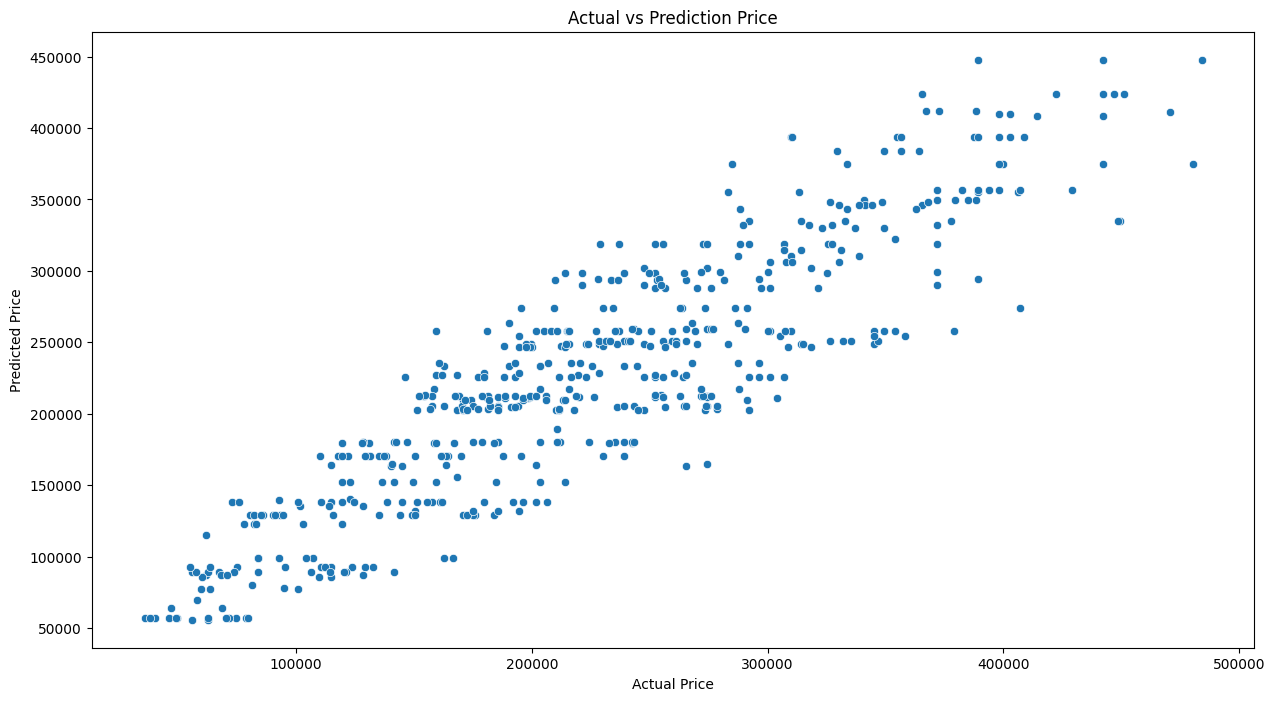

In [59]:
plt.figure(figsize=(15,8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs Prediction Price',
                                                          xlabel='Actual Price',
                                                          ylabel='Predicted Price')

### **Feature Importances**

Untuk menemukan fitur mana yang sebenarnya mempengaruhi target (price), satu hal yang dapat dilakukan adalah memeriksanya melalui fungsi feature_importances_.

In [60]:
# Feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
feature_imp.to_frame(name='Feature Importances')

,Feature Importances
one_hot_encoder__HallwayType_terraced,0.726929
remainder__N_Parkinglot(Basement),0.075315
remainder__YearBuilt,0.042532
remainder__N_FacilitiesInApt,0.041495
remainder__Size(sqf),0.039381
remainder__N_FacilitiesNearBy(ETC),0.027973
ordinal_encoder__TimeToSubway,0.009441
one_hot_encoder__HallwayType_mixed,0.008539
remainder__N_SchoolNearBy(University),0.006512
remainder__N_FacilitiesNearBy(PublicOffice),0.006467


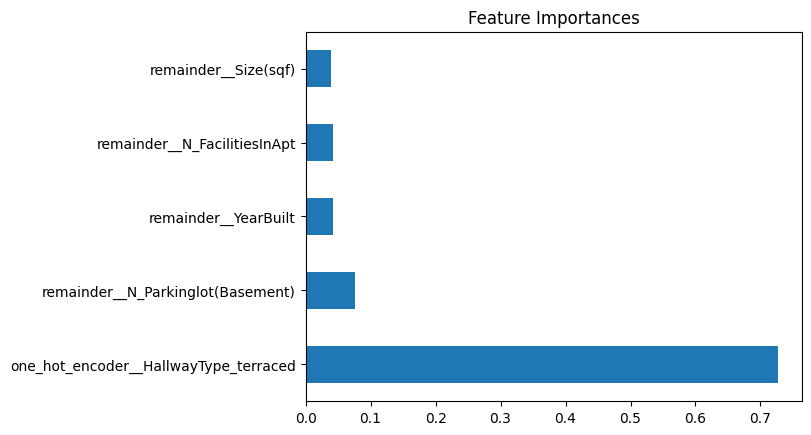

In [61]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

## **5. Conclusion**

Berdasarkan pemodelan yang telah dilakukan, fitur HallwayType (0.727) merupakan fitur yang paling berpengaruh terhadap SalePrice. Fitur lain yang berpengaruh terhadap SalePrice adalah N_Parkinglot (0.075) dan YearBuilt (0.043).

Metrik evaluasi yang digunakan dalam model adalah R-Square, RMSE, MAE & MAPE. Jika melihat nilai MAPE yang dihasilkan oleh model setelah dilakukan tuning hyperparameter, yaitu sebesar 18%, maka dapat disimpulkan bahwa jika model ini digunakan untuk mengestimasi harga apartemen di Daegu pada rentang nilai yang telah dilatihkan pada model (harga maksimum 511062 won), maka estimasi rata-rata akan menyimpang kurang lebih sebesar 18% dari harga sebenarnya.

Terdapat kemungkinan bahwa prediksi model dapat menyimpang lebih jauh dari harga aktual karena tingginya bias yang terlihat dari perbandingan antara harga prediksi dan harga aktual. Bias ini disebabkan oleh terbatasnya fitur dalam set data yang tidak cukup mewakili properti atau apartemen di Daegu, seperti tingkat lantai apartemen dan jenis pemanas.

Berdasarkan model final yang dipilih, feature yang paling berpengaruh terhadap harga apartment di Daegu adalah tipe apartment terraced, ukuran apartment, dan jumlah tempat parkir basement. Dengan menggunakan model final yang dipilih, kita dapat membantu agen real estate untuk menentukan harga jual apartment yang tepat di kota Daegu, Korea Selatan sehingga dapat meningkatkan tingkat kesuksesan untuk memasarkan dan menjual unit apartment tersebut.

Sebelum terdapat model regresi, kita hanya memiliki data mentah terkait karakteristik apartment dan harga apartment di Daegu yang sulit diinterpretasikan dan tidak memberikan wawasan yang berguna tentang hubungan antara karakteristik apartment dan harga apartment. Dengan adanya model regresi, kita dapat melakukan analisis yang lebih terperinci dan mendapatkan pemahaman yang lebih baik tentang bagaimana karakteristik apartment dan harga apartment saling berhubungan. Selain itu, model regresi juga dapat digunakan untuk memprediksi perubahan nilai harga apartment yang mungkin terjadi jika karakteristik apartment berubah. Dalam hal ini, impact setelah terdapat model regresi lebih besar dibandingkan sebelum adanya model regresi, karena agen real estate dapat mengambil tindakan atau keputusan yang lebih tepat berdasarkan hasil analisis model regresi yaitu dapat menentukan harga apartment yang sesuai.

## **6. Recommedation**

Berikut ini adalah rekomendasi yang dapat saya berikan:

1. Mempertimbangkan untuk menambah fitur yang memiliki hubungan yang lebih kuat terhadap harga apartment di Daegu, Korea Selatan secara langsung seperti pada lantai berapa apartement tersebut berada, tahun penjualan apartment, jumlah ruangan di dalam apartment (jumlah kamar tidur, kamar mandi, dapur), jumlah personel keamanan yang ditempatkan di apartment, informasi inklusivitas furniture di dalam apartment, dan lain sebagainya.

1. Mempertimbangkan faktor eksternal yang secara keseluruhan dapat berdampak pada harga jual apartment di Daegu, Korea Selatan seperti tingkat suku bunga, Indeks Harga Konsumen (IHK), kinerja Produk Domestik Bruto (PDB) tiap tahun, dan lain sebagainya.

1. Meningkatkan jumlah dan kualitas dataset untuk meningkatkan relevansi pada saat membangun model prediksi sehingga dapat menghasilkan model prediksi dengan akurasi yang lebih baik dan membantu meningkatkan model regresi untuk mempelajari pola-pola dalam data.

1. Mempertimbangkan untuk menggunakan model machine learning lain yang lebih kompleks untuk membangun model prediksi harga apartment seperti Recurrent Neural Network (RNN). Namun model yang lebih kompleks juga akan membuat model lebih sulit untuk dimengerti.

In [62]:
# Save model
import pickle

final_model = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
final_model.fit(x_train, y_train)

pickle.dump(final_model, open('Daegu_Apartment_XGB.sav', 'wb'))

In [63]:
# Load model
filename = 'Daegu_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [64]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(x_test)))

43108.49024293281